# Shapes input data analysis

### What do we know about the dataset

* Dataset contains 10000 small `28px * 28px * 1bit` images.
* There are 6 classes of objects - square, circle and triangle which can be pointed up, down, left or right.
* Every image consists of two classes of geometric shapes.
* There are always ten shapes on every image.
* All of the shapes are xor'ed.

In [12]:
from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datasets.shapes_dataset import ShapesClassificationDataset
from datasets.transformers import RandomVerticalFlip, RandomHorizontalFlip, RandomRightRotation

In [5]:
df = pd.read_csv('data/labels.csv')

In [3]:
df

,name,squares,circles,up,right,down,left
0,img_00000.png,0,0,4,0,6,0
1,img_00001.png,0,0,0,5,0,5
2,img_00002.png,0,0,8,0,2,0
3,img_00003.png,0,7,0,0,0,3
4,img_00004.png,0,0,3,0,0,7
...,...,...,...,...,...,...,...
9995,img_09995.png,3,0,7,0,0,0
9996,img_09996.png,8,0,2,0,0,0
9997,img_09997.png,8,0,0,0,0,2
9998,img_09998.png,6,0,0,4,0,0


In [4]:
df.describe()

,squares,circles,up,right,down,left
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.65740,1.714900,1.653000,1.677000,1.685700,1.612000
std,2.62909,2.656073,2.619557,2.627539,2.641101,2.574979
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
max,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000


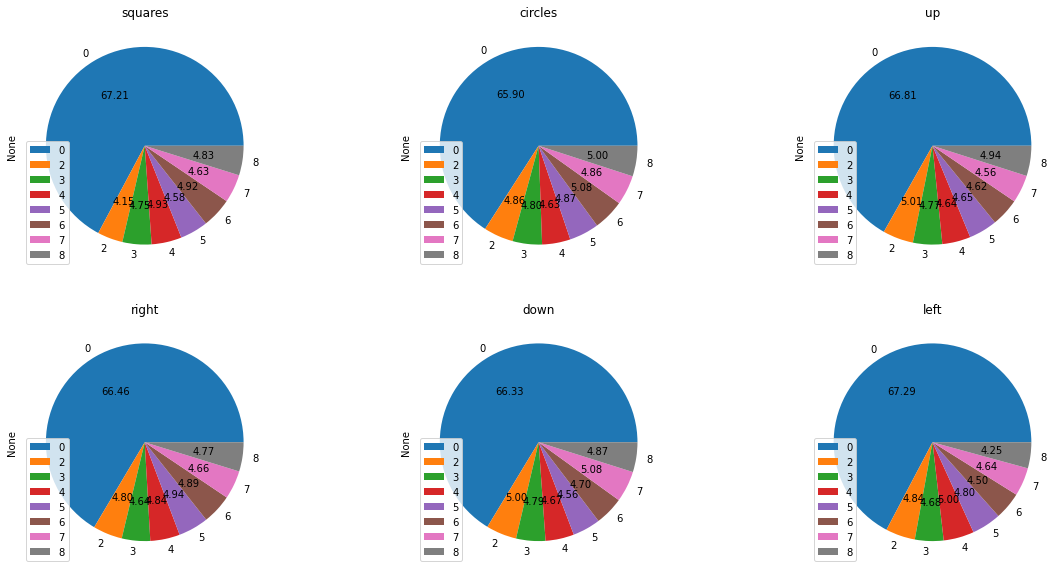

In [23]:
def plot_distribution_of_results(df):
    fig, axes = plt.subplots(2, 3, figsize=(20,10))

    axe = axes.ravel()
    
    for i, c in enumerate(df.drop(columns=['name']).columns):
        df.groupby([c]).size().plot(kind='pie', autopct='%.2f', ax=axe[i], title=c, fontsize=10)
        axe[i].legend(loc=3)
        plt.ylabel("")
        plt.xlabel("")
        
    plt.show()
    
plot_distribution_of_results(df)


Looking at the plots we can assume that there's nothing wrong with the data, but to be sure let's look at the distribution after splitting the dataset.

### Training data

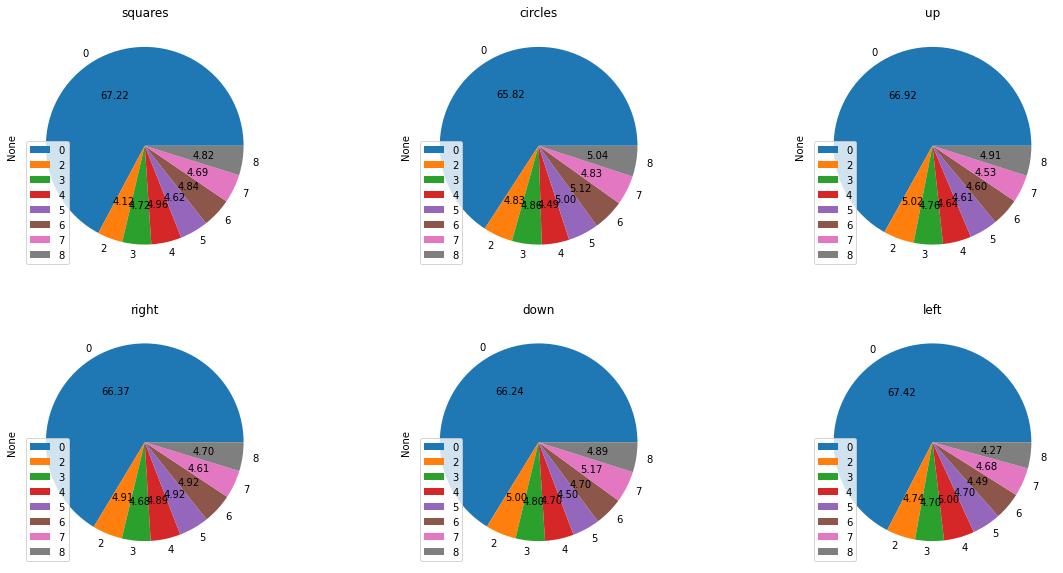

In [24]:
plot_distribution_of_results(df[:9000])

### Validation data

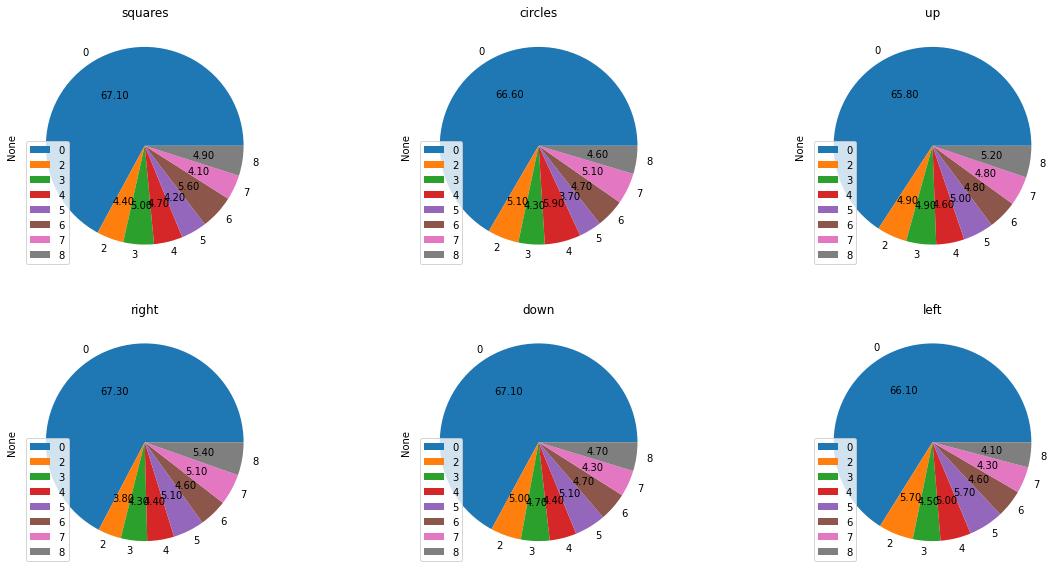

In [26]:
plot_distribution_of_results(df[9000:10000])

### Let's try our custom dataset for classification

In [3]:
dataset_raw = ShapesClassificationDataset(
    "data/labels.csv",
    "data/images",
)

In [9]:
def draw_example(dataset):
    fig = plt.figure(figsize=(15, 15))

    for i in range(len(dataset)):
        image, target = dataset[i]

        print(f"Target ({i}): ", target)

        ax = plt.subplot(1, 6, i + 1)
        plt.tight_layout()
        ax.set_title(f'Sample #{i}')
        ax.axis('off')
        plt.imshow(image)

        if i == 5:
            plt.show()
            break

Target (0):  [0. 0. 1. 0. 1. 0.]
Target (1):  [0. 0. 0. 1. 0. 1.]
Target (2):  [0. 0. 1. 0. 1. 0.]
Target (3):  [0. 1. 0. 0. 0. 1.]
Target (4):  [0. 0. 1. 0. 0. 1.]
Target (5):  [0. 0. 1. 0. 1. 0.]


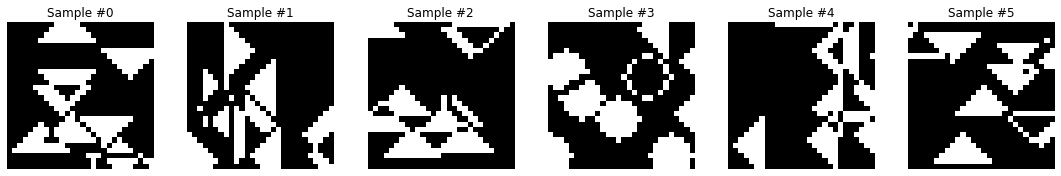

In [10]:
draw_example(dataset_raw)

### Let's see the rotation

In [13]:
dataset_rotation = ShapesClassificationDataset(
    "data/labels.csv",
    "data/images",
    transform_all=transforms.Compose([RandomRightRotation(1)])
)

Target (0):  [0. 0. 0. 1. 0. 1.]
Target (1):  [0. 0. 1. 0. 1. 0.]
Target (2):  [0. 0. 0. 1. 0. 1.]
Target (3):  [0. 1. 1. 0. 0. 0.]
Target (4):  [0. 0. 1. 1. 0. 0.]
Target (5):  [0. 0. 0. 1. 0. 1.]


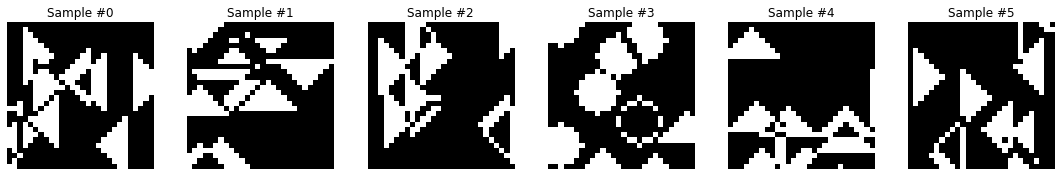

In [14]:
draw_example(dataset_rotation)

### Horizontal flip

In [15]:
dataset_horizontal = ShapesClassificationDataset(
    "data/labels.csv",
    "data/images",
    transform_all=transforms.Compose([RandomHorizontalFlip(1)])
)

Target (0):  [0. 0. 1. 0. 1. 0.]
Target (1):  [0. 0. 0. 1. 0. 1.]
Target (2):  [0. 0. 1. 0. 1. 0.]
Target (3):  [0. 1. 0. 0. 0. 1.]
Target (4):  [0. 0. 0. 0. 1. 1.]
Target (5):  [0. 0. 1. 0. 1. 0.]


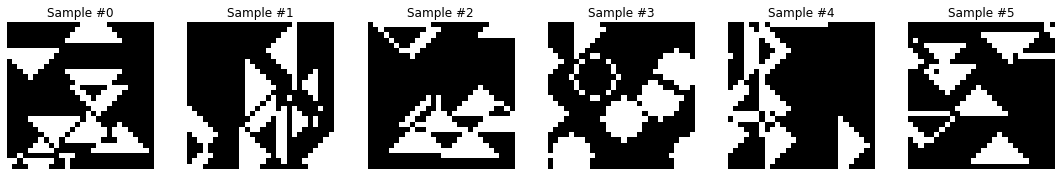

In [18]:
draw_example(dataset_horizontal)

### And the vertical flip

In [19]:
dataset_vertical = ShapesClassificationDataset(
    "data/labels.csv",
    "data/images",
    transform_all=transforms.Compose([RandomVerticalFlip(1)])
)

Target (0):  [0. 0. 1. 0. 1. 0.]
Target (1):  [0. 0. 0. 1. 0. 1.]
Target (2):  [0. 0. 1. 0. 1. 0.]
Target (3):  [0. 1. 0. 1. 0. 0.]
Target (4):  [0. 0. 1. 1. 0. 0.]
Target (5):  [0. 0. 1. 0. 1. 0.]


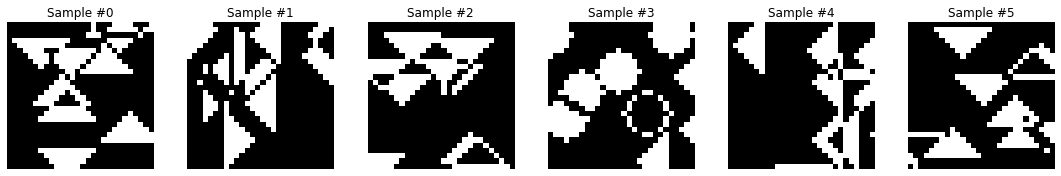

In [20]:
draw_example(dataset_vertical)

Everything looks good, with these 3 operations we can achieve all possible arragments